In [221]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

In [222]:
alpha1, alpha2, r1, r2, K1, K2, x, y = symbols("alpha1 alpha2 r1 r2 K1 K2 x y")


def xp():
    return r1 * x * (1 - x / K1) - alpha1 * x * y


def yp():
    return r2 * y * (1 - y / K2) - alpha2 * x * y


def find_J():
    return Matrix(
        [
            [simplify(diff(xp(), x)), simplify(diff(xp(), y))],
            [simplify(diff(yp(), x)), simplify(diff(yp(), y))],
        ]
    )


print("eq pts:")
print(
    solve(
        [
            r1 * x * (1 - x / K1) - alpha1 * x * y,
            r2 * y * (1 - y / K2) - alpha2 * x * y,
        ],
        [x, y],
    )
)

print("nullclines:")
print(solve(xp(), [x]))
print(solve(yp(), [y]))
find_J()

eq pts:
[(0, 0), (0, K2), (K1, 0), (K1*r2*(-K2*alpha1 + r1)/(-K1*K2*alpha1*alpha2 + r1*r2), (-K1*K2*alpha2*r1 + K2*r1*r2)/(-K1*K2*alpha1*alpha2 + r1*r2))]
nullclines:
[0, K1*(-alpha1*y + r1)/r1]
[0, K2*(-alpha2*x + r2)/r2]


Matrix([
[-alpha1*y + r1 - 2*r1*x/K1,                  -alpha1*x],
[                 -alpha2*y, -alpha2*x + r2 - 2*r2*y/K2]])

In [223]:
def J(x, y):
    J11 = simplify(-alpha1 * y + r1 - 2 * r1 * x / K1)
    J12 = simplify(-alpha1 * x)
    J21 = simplify(-alpha2 * y)
    J22 = simplify(-alpha2 * x + r2 - 2 * r2 * y / K2)
    return Matrix([[J11, J12], [J21, J22]])


jacob = J(
    K1 * r2 * (-K2 * alpha1 + r1) / (-K1 * K2 * alpha1 * alpha2 + r1 * r2),
    (-K1 * K2 * alpha2 * r1 + K2 * r1 * r2) / (-K1 * K2 * alpha1 * alpha2 + r1 * r2),
)
# jacob = J(K1,0)
Tr = simplify(jacob[0] + jacob[2])
det = simplify(jacob.det())
lam = symbols("λ")
# solve(lam**2 - Tr*lam + det,lam)[0]
solve(lam**2 - Tr * lam + det, lam)[1]

(-r1*(K1*K2*alpha2**2 + K2*alpha1*r2 - K2*alpha2*r2 - r1*r2) + sqrt(r1*(4*K1**2*K2**2*alpha1**2*alpha2**2*r2 + K1**2*K2**2*alpha2**4*r1 - 4*K1**2*K2*alpha1*alpha2**2*r1*r2 - 4*K1*K2**2*alpha1**2*alpha2*r2**2 + 2*K1*K2**2*alpha1*alpha2**2*r1*r2 - 2*K1*K2**2*alpha2**3*r1*r2 - 2*K1*K2*alpha2**2*r1**2*r2 + 4*K1*alpha2*r1**2*r2**2 + K2**2*alpha1**2*r1*r2**2 - 2*K2**2*alpha1*alpha2*r1*r2**2 + K2**2*alpha2**2*r1*r2**2 - 2*K2*alpha1*r1**2*r2**2 + 4*K2*alpha1*r1*r2**3 + 2*K2*alpha2*r1**2*r2**2 + r1**3*r2**2 - 4*r1**2*r2**3)))/(2*(K1*K2*alpha1*alpha2 - r1*r2))

/tmp/ipykernel_20506/3504605896.py:22: RuntimeWarning: invalid value encountered in divide
  dX /= M
/tmp/ipykernel_20506/3504605896.py:23: RuntimeWarning: invalid value encountered in divide
  dY /= M


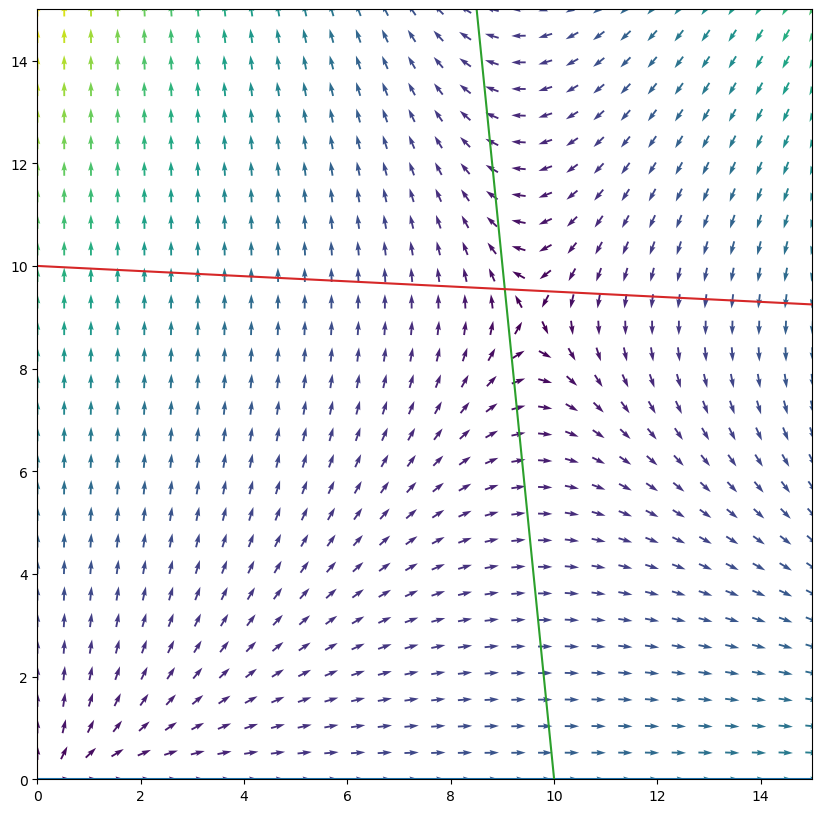

In [ ]:
xlim, ylim = 15, 15
x = np.linspace(0, xlim, 30)
y = np.linspace(0, ylim, 30)
X, Y = np.meshgrid(x, y)
K1, K2 = 100, 200
alpha1, alpha2 = 0.1, 0.2
r1, r2 = 1, 2


def derivatives(X, Y):
    x, y = X, Y
    return np.array(
        [
            r1 * x * (1 - x / K1) - alpha1 * x * y,
            r2 * y * (1 - y / K2) - alpha2 * x * y,
        ]
    )


dX, dY = derivatives(X, Y)

M = np.sqrt(dX**2 + dY**2)
dX /= M
dY /= M
M[M == 0] = 1
plt.figure().set_size_inches(10, 10)
plt.quiver(X, Y, dX, dY, M, pivot="mid")
plt.xlim(0, xlim)
plt.ylim(0, ylim)
plt.plot(x, 0 * y)
plt.plot(0 * x, y)
plt.plot(x, K1 * (-alpha1 * y + r1) / r1)
plt.plot(K2 * (-alpha2 * x + r2) / r2, y)
plt.show()